#### **Representing Systems of Equations as Matrices**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a name='1'></a>
## 1 - Representing System of Linear Equations using Matrices 

<a name='1.1'></a>
### 1.1 - System of Linear Equations

A **system of linear equations** (or **linear system**) is a collection of one or more linear equations involving the same variables. For example:


$$
\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}
$$

is a system of two equations with two unknown variables $x_1$ and $x_2$. **To solve** a system of linear equations means to find values for the variables $x_1$ and $x_2$ such that all of its equations are simultaneously satisfied.

A linear system is **singular** if it has no unique solution, and otherwise, it is said to be **non-singular**.

<a name='1.2'></a>
### 1.2 - System of Linear Equations as Matrices
In the lecture, you saw that we represented linear systems of equations as matrices. The system $(1)$ represented as a matrix is as follows:

$$
\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix}
$$ 

Each row represents an equation in the system. The first column represents the coefficients of $x_1$ in the system, the second column represents the coefficients of $x_2$, and the third column represents the constant values on the right side of the equals signs in the equations.

We could further choose to represent the coefficients of the system $(1)$ as its own matrix $A$ as follows:

$$
\begin{bmatrix}
-1 & 3\\
3 & 2
\end{bmatrix}
$$

and the outputs of the system as a vector $b$ like this:

$$
\begin{bmatrix}
7 \\
1
\end{bmatrix}
$$

We show the matrix $A$ and vector $b$ in `NumPy` below:

 - (Ax = b)

In [2]:
A = np.array([[-1,3],[3,2]], dtype = np.dtype(float))
b = np.array([7,1], dtype = np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[-1.  3.]
 [ 3.  2.]]

Array b:
[7. 1.]


In [3]:

print(f"Shape da matriz A: {A.shape}")

print(f"Shape do vetor b: {b.shape}")

Shape da matriz A: (2, 2)
Shape do vetor b: (2,)


To find the solution of the system $(1)$, we will simply use the `np.linalg.solve(A, b)` function. The result will be saved in the 1-D array $x$, where the elements correspond to the values of $x_1$ and $x_2$:

In [4]:
x_solution = np.linalg.solve(A,b)

print(f"Solution: {x_solution}")

Solution: [-1.  2.]


<a name='1.3'></a>
### 1.3 - Evaluating Determinant of a Matrix

The matrix $A$ corresponding to the linear system $(1)$ is a **square matrix** - it has the same number of rows and columns. In the case of a square matrix, it is possible to calculate its determinant - a real number which characterizes some properties of the matrix. A linear system containing two (or more) equations with the same number of unknown variables will have one solution if and only if matrix $A$ has a non-zero determinant.

Let's calculate the determinant using the `NumPy` linear algebra package. You can do it with the `np.linalg.det(A)` function. 

In [5]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

if np.isclose(d, 0, atol=1e-9):
    print("Matrix singular.")
else:
    print("Matrix non-singular.")


Determinant of matrix A: -11.00
Matrix non-singular.


<a name='2'></a>
## 2 - Visualizing 2x2 Systems as Plotlines

$$
\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix}
$$

In [6]:
A_system = np.hstack((A,b.reshape((2,1))))

print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


In [7]:
print(A_system[1])
print(A_system[0])

[3. 2. 1.]
[-1.  3.  7.]


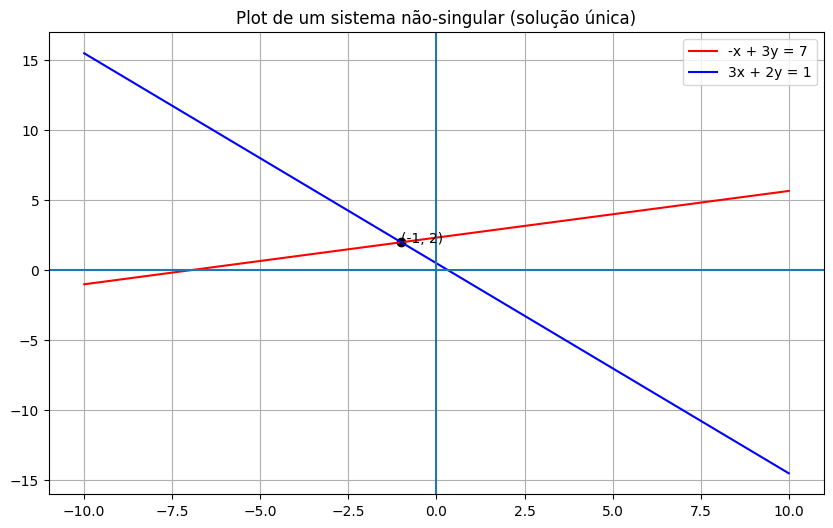

In [8]:
x_values = np.linspace(-10,10,1000)

y_1 = (x_values+7)/3
y_2 = (-3*x_values + 1)/2

p_x , p_y = x_solution[0], x_solution[1]

# Plot - Lines
plt.figure(figsize=(10,6))
plt.title("Plot de um sistema não-singular (solução única)")
plt.plot(x_values,y_1, color = 'red', label = '-x + 3y = 7')
plt.plot(x_values, y_2, color = 'blue', label = '3x + 2y = 1')

# Point solution
plt.scatter(p_x, p_y, color = 'black')
plt.text(p_x, p_y, '(-1, 2)')

plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.grid()

plt.show()



<a name='3'></a>
## 3 - System of Linear Equations with No Solutions

Given another system of linear equations:

$$
\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{2}
$$

Let's find the determinant of the corresponding matrix.

In [9]:
A_2 = np.array([[-1,3],[3,-9]], dtype = np.dtype(float))
b_2 = np.array([7,1])
print("Matrix A:")
print(A_2)
print("\nArray b:")
print(b_2)

Matrix A:
[[-1.  3.]
 [ 3. -9.]]

Array b:
[7 1]


In [10]:
d_2 = np.linalg.det(A_2)
print(f"Determinant of matrix A: {d_2:.2f}")


Determinant of matrix A: 0.00


It is equal to zero, thus the system cannot have one unique solution. It will either have infinitely many solutions or none. 

In [11]:
try:

    x_2 = np.linalg.solve(A_2, b_2)

except np.linalg.LinAlgError as err:
    
    print(err)

Singular matrix


Construct the matrix corresponding to this linear system:

In [12]:
A_2_system = np.hstack((A_2, b_2.reshape((2,1))))
print(A_2_system)


[[-1.  3.  7.]
 [ 3. -9.  1.]]


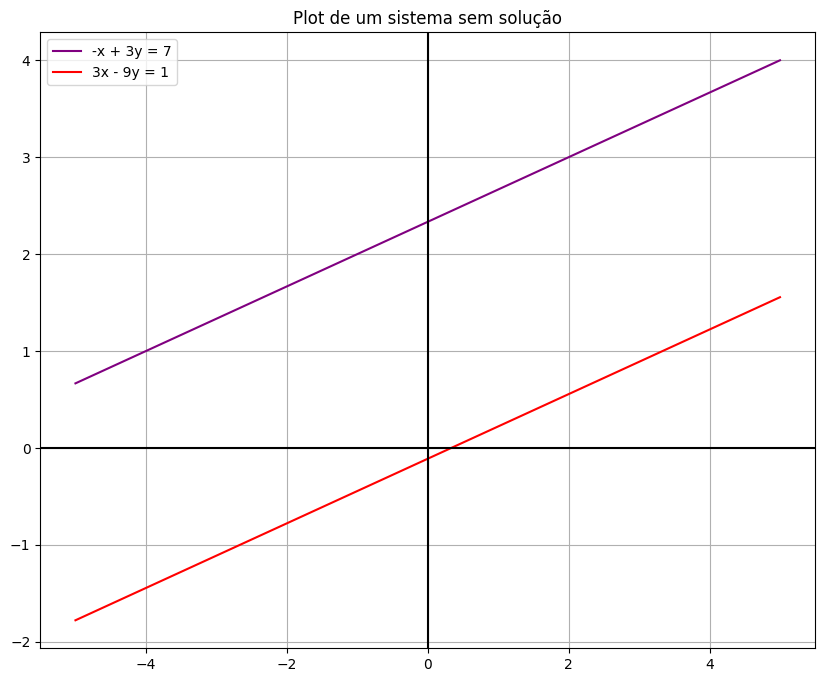

In [13]:
x_values = np.linspace(-5,5,100)

y_1 = (x_values + 7)/3
y_2 = (x_values/3) - (1/9)

plt.figure(figsize = (10,8))
plt.title("Plot de um sistema sem solução")
plt.plot(x_values, y_1, label = '-x + 3y = 7', color = 'purple')
plt.plot(x_values,y_2, label = '3x - 9y = 1', color = 'red')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid()
plt.legend()

plt.show()

<a name='4'></a>
## 4 - System of Linear Equations with an Infinite Number of Solutions

By changing the free coefficients of the system $(2)$, you can bring it to consistency:

$$
\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=-21, \end{cases}\tag{3}
$$

In [14]:
A_3 = np.array([[-1,3],[3,-9]], dtype=np.dtype(float))
b_3 = np.array([7,-21],dtype=np.dtype(float))

print("Matrix A:")
print(A_3)
print("\nArray b:")
print(b_3)

Matrix A:
[[-1.  3.]
 [ 3. -9.]]

Array b:
[  7. -21.]


In [15]:
try: 

    x_3 = np.linalg.solve(A_3,b_3)

except np.linalg.LinAlgError as err:

    print(err)


Singular matrix


In [16]:
d_3 = np.linalg.det(A_3)

print(f"Determinant of matrix A: {d_2:.2f}")

Determinant of matrix A: 0.00


In [17]:
A_3_system = np.hstack((A_3, b_3.reshape((2,1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


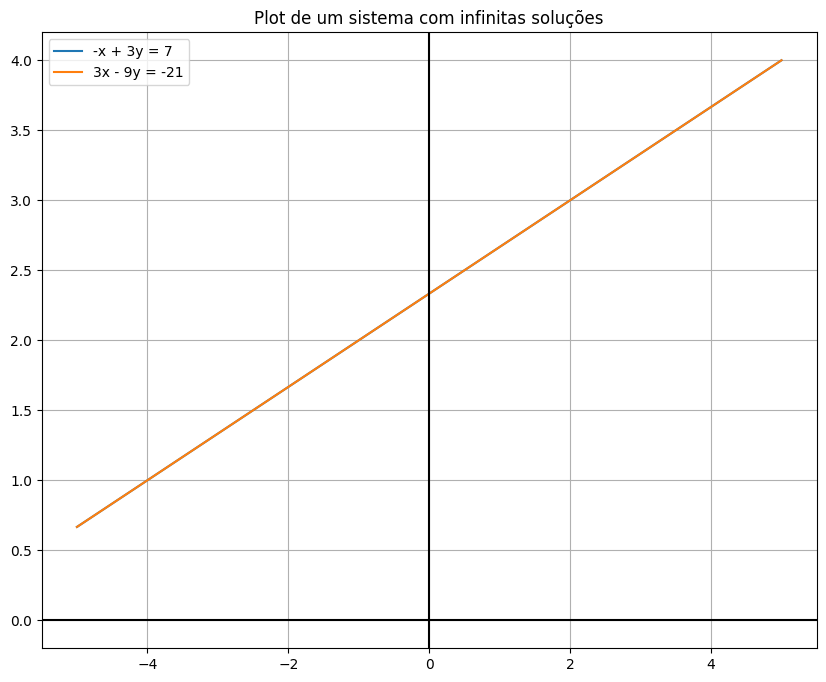

In [18]:
x_values = np.linspace(-5,5,100)

y_1 = (x_values+7)/3
y_2 = (x_values/3) + (21/9)

plt.figure(figsize = (10,8))
plt.title("Plot de um sistema com infinitas soluções")
plt.plot(x_values, y_1, label = '-x + 3y = 7')
plt.plot(x_values, y_2, label = '3x - 9y = -21')
plt.axvline(0, color = 'black')
plt.axhline(0, color = 'black')
plt.legend()
plt.grid()
plt.show()